# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
!pip install wandb
!pip install pytorch_lightning torchmetrics

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [1]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
wandb: Currently logged in as: danilov6083. Use `wandb login --relogin` to force relogin


True

In [2]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import warnings
import urllib3

warnings.filterwarnings('ignore')
urllib3.disable_warnings()

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(42)

In [4]:
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps' # Hi, Apple Silicon
else:
    device = 'cpu'

device

'mps'

In [8]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-06 13:10:43--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6028:18::a27d:4712, 162.125.72.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6028:18::a27d:4712|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-06 13:10:44--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9849b41551f2451897566a45eb.dl.dropboxusercontent.com/cd/0/get/CHA27miZhXCRskC0TsGipx2XklplNw2gbNtSw8Ag6Xj4_GOdVrByD_p1VqOGETs-BCJjVlhDJLiYEFCQAIFHnJoJUOev3iKBPo0N_jf0RBQlWn4sUPMws4W7fYSvmPJfK73tIrg22AL3HNxeXhy6tg2A/file?dl=1# [following]
--2023-11-06 13:10:44--  https://uc9849b41551f2451897566a45eb.dl.dropboxusercontent.com/cd/0/get/CHA27miZhXCRskC0TsGipx2XklplNw2gbNtSw8Ag6Xj4_GOdVrByD_p1VqOGETs-BCJjVlhDJLiYEFCQAIFH

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

Так как названия датасета у меня нет, то придется самому считать среднее и дисперсию, чтобы нормализовать пикчи
Сначала перегоним картинки в тензор и посчитаем отклонения:

In [5]:
seed_everything(42)

def calculate_deviations(dataloader: DataLoader) -> dict:
    """
    :param dataloader: DataLoader with images with; batch_size must be equal to len(dataset)
    :return: dict with 'mean' and 'std' keys
    """
    
    images, labels = next(iter(dataloader))
    
    # shape картинок [batch_size, channels, width, height]
    # то есть берем весь датасет,
    # в нем берем высоту и ширину каждой картинки
    # и считаем коэффициенты для каждого канала
    mean = images.mean([0, 2, 3]).tolist()
    std = images.std([0, 2, 3]).tolist()
    
    return {
        'mean': mean,
        'std': std
    }


In [6]:
seed_everything(42)

to_tensor = transforms.Compose([transforms.ToTensor()])

train_dataset = ImageFolder('./dataset/dataset/train', transform=to_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset))

In [7]:
seed_everything(42)

deviations = calculate_deviations(train_dataloader)
means = deviations['mean']
std = deviations['std']

print(f'mean {means}, std {std}')

mean [0.4802360236644745, 0.4480658173561096, 0.39750686287879944], std [0.2764364182949066, 0.2688632905483246, 0.28158992528915405]


Применяем нормализацию:

In [8]:
seed_everything(42)

train_augmentation = transforms.Compose(
    [
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize(means, std)
    ]
)

validation_augmentation = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(means, std)
    ]
)

In [9]:
seed_everything(42)

normalized_train_dataset = ImageFolder('./dataset/dataset/train', transform=train_augmentation)
normalized_validation_dataset = ImageFolder('./dataset/dataset/val', transform=validation_augmentation)

batch_size = 512

normalized_train_dataloader = DataLoader(normalized_train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
normalized_validation_dataloader = DataLoader(normalized_validation_dataset, batch_size=batch_size, num_workers=2)

In [10]:
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


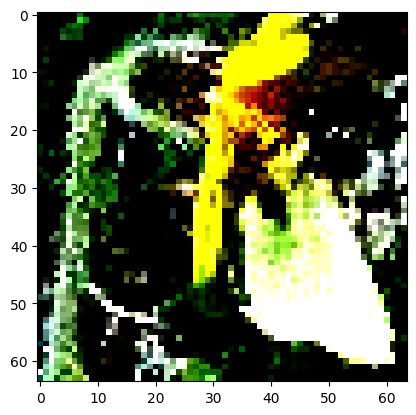

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


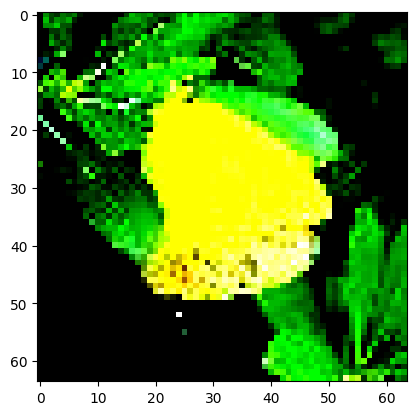

In [11]:
for batch in normalized_validation_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

Красивое...
Проверим, что нормализация отработала правильно:

In [12]:
seed_everything(42)

check_dataloader = DataLoader(normalized_train_dataset, batch_size=len(normalized_train_dataset))
check_deviations = calculate_deviations(check_dataloader)
check_means = check_deviations['mean']
check_std = deviations['std']

print(f'mean {check_means}, std {check_std}')

mean [-0.12346699833869934, -0.12441446632146835, -0.10423944145441055], std [0.2764364182949066, 0.2688632905483246, 0.28158992528915405]


Видно, что среднее по факту является нулем, а дисперсия равна 1. Значит, все ок

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [13]:
class CustomNet(torch.nn.Module):
    def __init__(self, class_nums: int, dropout_p: float = 0.4):
        super().__init__()
        self.class_nums = class_nums
        
        self.batch_norm1 = nn.BatchNorm2d(3)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            self.relu,
            self.maxpool
        )
        self.batch_norm2 = nn.BatchNorm2d(16)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            self.relu,
            self.maxpool
        )
        
        self.fully_connected1 = nn.Linear(in_features=32 * 14 * 14, out_features=512)
        self.fully_connected2 = nn.Linear(in_features=512, out_features=384)
        
        self.dropout = nn.Dropout(dropout_p)
        
        self.fully_connected3 = nn.Linear(in_features=384, out_features=class_nums)
        
        # ==========================
        self.loss_fun = nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.predictions = torch.Tensor()
        
        self.accuracy = None

    def _forward(self, x):
        out = self.batch_norm1(x)
        out = self.conv1(out)
        out = self.batch_norm2(out)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)
        out = self.fully_connected1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fully_connected2(out)
        out = self.relu(out)
        out = self.fully_connected3(out)

        return out

    def forward(self, images, target=None):
        output = self._forward(images)
        
        if target is None:
            return output
        
        loss = self.loss_fun(output, target)
            
        self.targets = torch.cat((self.targets, target.cpu()), 0)
            
        prediction = torch.argmax(output, dim=1)
        self.predictions = torch.cat((self.predictions, prediction.cpu()), 0)
        self.accuracy = accuracy(self.predictions.long(), self.targets.long(), task='multiclass', num_classes=self.class_nums)
        
        return loss

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.predictions = torch.Tensor()
            
        return self.accuracy


### Тренировочный класс lightning

In [15]:
class CustomLightningModule(pl.LightningModule):
    def __init__(self, model: CustomNet, learning_rate: float):
        super().__init__()
        
        self.scheduler = None
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        
        lr_fun = lambda epoch: 0.65 ** epoch
        self.scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lr_fun)
        
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        
        loss = self.model(images, target)
        accuracy = self.model.get_accuracy()
        
        self.log('train_loss', loss, prog_bar=True) 
        self.log('train_accuracy', accuracy, prog_bar=True)
        
        return loss
    
    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        
        loss = self.model(images, target)
        accuracy = self.model.get_accuracy()

        self.log('val_loss', loss, prog_bar=True)
        self.log('val_accuracy', accuracy, prog_bar=True)

In [16]:
learning_rate = 0.01

model = CustomNet(
    class_nums=len(normalized_train_dataset.classes)
).to(device)

module = CustomLightningModule(model, learning_rate);

# ПИЗДИМ МОДЕЛЬ

In [14]:
class CustomLightningModule(pl.LightningModule):
    def __init__(self, out_classes: int, learning_rate: float):
        super().__init__()

        self.class_nums = out_classes
        self.learning_rate = learning_rate
        
        self.model = torchvision.models.resnet18(pretrained=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, out_classes)
   
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        
        # scheduler_fun = lambda epoch: 0.65 ** epoch
        self.scheduler = torch.optim.lr_scheduler.ExponentialLR(self.optimizer, gamma=0.8)
        
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch

        predictions = self.forward(images)
        loss = self.loss(predictions, target)
        accuracy = self.get_accuracy(predictions, target)

        self.log('train_loss', loss, prog_bar=True)
        self.log('train_accuracy', accuracy, prog_bar=True)
        
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch

        predictions = self.forward(images)
        loss = self.loss(predictions, target)
        accuracy = self.get_accuracy(predictions, target)

        self.log('val_loss', loss, prog_bar=True)
        self.log('val_accuracy', accuracy, prog_bar=True)

        self.scheduler.step()

    def get_accuracy(self, predictions, target):
        return accuracy(torch.argmax(predictions, dim=-1).long(), target.long(), task='multiclass', num_classes=self.class_nums)

In [15]:
seed_everything(42)

wandb_project = 'homework_2'
run_name = 'resnet18 lr 0.01 batch_size 512 augmentations exponentialLR'
wandb_logger = WandbLogger(project=wandb_project, log_model='all', name=run_name)

In [16]:
seed_everything(42)

module = CustomLightningModule(len(normalized_train_dataset.classes), 0.01)

In [17]:
seed_everything(42)

trainer = pl.Trainer(accelerator=device, max_epochs=10, logger=wandb_logger)
trainer.fit(module, normalized_train_dataloader, normalized_validation_dataloader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.wa

Training: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.wa

Validation: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.wa

Validation: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.wa

Validation: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.wa

Validation: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.wa

Validation: |          | 0/? [00:00<?, ?it/s]

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x17909ef10>> (for post_run_cell), with arguments args (<ExecutionResult object at 287212190, execution_count=17 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 127722a00, raw_cell="seed_everything(42)

trainer = pl.Trainer(accelera.." store_history=True silent=False shell_futures=True cell_id=None> result=None>,),kwargs {}:


TypeError: _pause_backend() takes 1 positional argument but 2 were given

### Валидация результатов задания

In [ ]:
def evaluate_task(model, validation_dataloader, device="cuda:0"):
    model = model.to(device)
    
    accuracy = 0.0
    
    model.eval()
    for images, labels in tqdm(validation_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
            
        accuracy += acc_batch
        
    accuracy = accuracy / len(validation_dataloader)
    
    return accuracy

In [ ]:
final_accuracy = evaluate_task(module.model, normalized_validation_dataloader, device)
print(f'accuracy {final_accuracy}')
print(f'Оценка за это задание составит {np.clip(10 * final_accuracy / 0.44, 0, 10):.2f} баллов')

### Эксперименты

1ая модель
```python
        self.vgg = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fully_connected1 = nn.Linear(16 * 32 * 32, 128)
        self.fully_connected2 = nn.Linear(128, self.class_nums)
```
oprimizer Adagrad, lr 0.01
validation accuracy 0.13948

2 модель
```python
        self.batch_norm1 = nn.BatchNorm2d(3)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            self.relu,
            self.maxpool
        )
        self.batch_norm2 = nn.BatchNorm2d(16)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            self.relu,
            self.maxpool
        )
        
        self.fully_connected1 = nn.Linear(in_features=64 * 14 * 14, out_features=512)
        self.fully_connected2 = nn.Linear(in_features=512, out_features=384)
        
        self.dropout = nn.Dropout(dropout_p)
        
        self.fully_connected3 = nn.Linear(in_features=384, out_features=class_nums)
```
optimizer Adagrad, lr 0.01
Сначала accuracy рос лучше, чем в 1 модели, но потом начал падать

3 модель
```python
        self.batch_norm1 = nn.BatchNorm2d(3)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            self.relu,
            self.maxpool
        )
        self.batch_norm2 = nn.BatchNorm2d(16)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            self.relu,
            self.maxpool
        )
        
        self.fully_connected1 = nn.Linear(in_features=32 * 14 * 14, out_features=512)
        self.fully_connected2 = nn.Linear(in_features=512, out_features=384)
        
        self.dropout = nn.Dropout(dropout_p)
        
        self.fully_connected3 = nn.Linear(in_features=384, out_features=class_nums)
```
optimizer Adam, lr 0.01
accuracy 0.226

4 и 5 модель запускал с шедулером
6 модель резнет18
7 модель резнет34
8 модель резнет18 20 эпох переобучается

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
class CustomNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE HERE
        pass

    def _forward(self, x):
        # runs the Neural Network
        # YOUR CODE HERE
        pass

    def forward(self, images, target=None):
        # YOUR CODE HERE
        pass

    def get_accuracy(self, reset=False):
        # YOUR CODE HERE
        pass

### Тренировочный класс lightning

In [ ]:
class CustomLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        # YOUR CODE HERE
        pass

    def forward(self, x):
        # YOUR CODE HERE
        pass

    def configure_optimizers(self):
        # YOUR CODE HERE
        pass

    def training_step(self, train_batch, batch_idx):
        # YOUR CODE HERE
        pass

    def validation_step(self, val_batch, batch_idx):
        # YOUR CODE HERE
        pass

In [ ]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

In [ ]:
model = CustomNet().to() # YOUR CODE HERE
module = CustomLightningModule() # YOUR CODE HERE

In [ ]:
trainer = pl.Trainer(logger=wandb_logger)  # YOUR CODE HERE
trainer.fit()  # YOUR CODE HERE

### Валидация результатов задания

In [ ]:
model = # Подгрузить свою сохраненную модель сюда

accuracy = evaluate_task(model, normalized_validation_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.